# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Read Data

In [2]:
pred = np.load('./data/pred.npy')

path='./data/column_name.txt'
with open(path,'r')  as f:
    col_name=f.read() 

col_name=col_name.split('\n')

x=pred

## Data Exploration

In [3]:
df_test = pd.read_csv('./data/test.csv')
df_test.describe()

try:
    del(df_test['id'])
    del(df_test['fiberID'])
except:
    pass
print(df_test.shape)
df_test.describe()

(10009, 20)


,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,20.987400,19.878440,19.280218,18.873165,18.618385,21.184506,20.091376,19.497732,19.083329,18.826624,20.715429,19.462021,18.995001,18.616519,18.411996,20.739001,19.534844,18.935095,18.522308,18.281069
std,2.111703,2.573890,1.709344,1.720713,1.702236,1.990940,1.865064,1.710070,1.633953,1.711790,2.807434,13.971203,1.979225,1.970463,2.373022,2.187025,1.957506,1.856617,1.796820,1.867582
min,-7.248195,-42.663871,9.134712,-22.522266,13.349827,9.390439,8.188752,12.288183,12.688984,-8.455932,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,19.655525,18.671025,18.037847,17.742016,17.424701,19.940430,18.892043,18.253627,17.905253,17.610776,19.249432,18.104265,17.475078,17.043615,16.805557,19.268471,18.064625,17.424393,16.971911,16.715685
50%,20.854404,19.910333,19.444925,19.033283,18.594713,21.040735,20.071658,19.627904,19.180605,18.699819,20.371014,19.582955,19.197068,18.684269,18.171966,20.412702,19.541261,19.155839,18.635195,18.095883
75%,22.160801,21.150040,20.489912,20.083814,19.878652,22.339213,21.402558,20.756306,20.331848,20.119736,21.803705,21.025719,20.428279,20.015701,19.815916,21.992969,20.981396,20.389215,19.970657,19.823902
max,37.681143,182.654452,31.883768,47.227391,34.946057,41.169991,47.160580,29.266687,31.146742,26.478564,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


# Explore the Data 

## From Knowledge

특정 조건을 선택한 경우

      COLUMN   Count     Mean      Std     Median
    psfMag_u       3  20.9873   2.0827    20.8537
    psfMag_g       4  19.8635   1.8621    19.9102
    psfMag_r       2    19.28   1.7018    19.4449
    psfMag_i       4  18.8708   1.6254     19.033
    psfMag_z       2  18.6153   1.6882    18.5945
  fiberMag_u       4  21.1834    1.971    21.0407
  fiberMag_g       3  20.0885   1.8365    20.0711
  fiberMag_r       0  19.4977     1.71    19.6279
  fiberMag_i       1  19.0821   1.6295    19.1805
  fiberMag_z       2  18.8304   1.6869     18.701
  petroMag_u      32  20.6937    2.262    20.3688
  petroMag_g      20  19.5988   2.0235     19.581
  petroMag_r       7  19.0002   1.9011    19.1979
  petroMag_i      10   18.608   1.8648    18.6839
  petroMag_z      13  18.4102   2.0236    18.1718
  modelMag_u       1  20.7378   2.1838    20.4125
  modelMag_g       0  19.5348   1.9574    19.5413
  modelMag_r       0  18.9351   1.8565    19.1558
  modelMag_i       0  18.5223   1.7

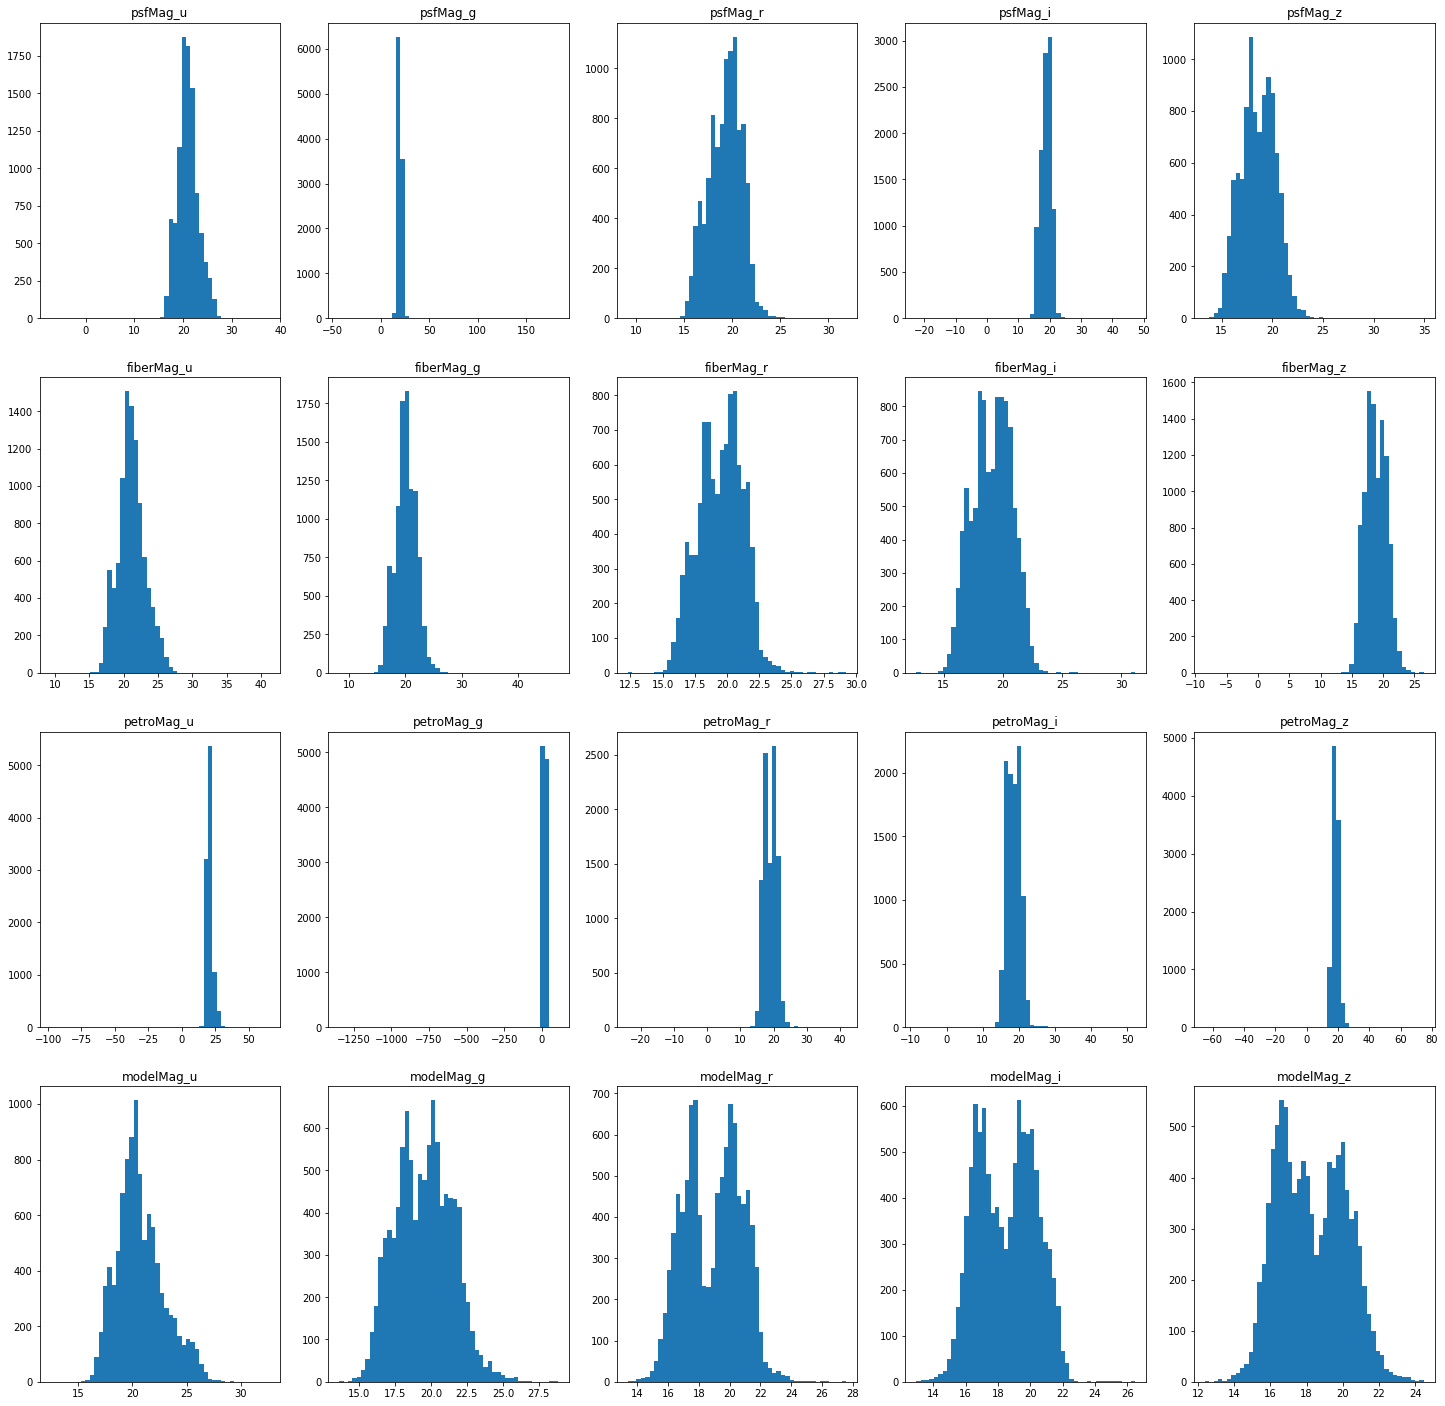

In [4]:
plt.figure(figsize=(25,25))

x1_da = x.copy()

x_max = 31
x_min = 12

for i in range(20):
    
    idx=(x1_da[:,i]> x_max) | (x1_da[:,i] < x_min)
    
    val1=len(x1_da[idx,i])
    val2=np.round(x1_da[~idx,i].mean(),4)
    val3=np.round(x1_da[~idx,i].std(),4)
    val4=np.round(np.median((x1_da[~idx,i])),4)
    
    if i ==0: 
        print("특정 조건을 선택한 경우\n")
        print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format('COLUMN','Count','  Mean', 'Std', 'Median'))
    print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format(col_name[i],val1,val2,val3,val4))

    #######################
    #
    #   이상치 제거
    #
    #x1_da[idx,i]=val4
    #
    #
    #######################
    
    plt.subplot(4,5,i+1)
    plt.hist(x1_da[:,i],bins=50)
    plt.gca().set_title(col_name[i])
   
# print('\n'*3)
# for i in range(20):
#     xmean=np.round(x1_da[:,i].mean(),4)
#     print('{:>23}'.format(col_name[i]+' Mean value: '),xmean)

In [ ]:
plt.figure(figsize=(14,14))
x1_fr=pd.DataFrame(x1_da)
sns.heatmap(data = x1_fr.corr(), annot=True, fmt = '.2f', linewidths=.8, cmap='Reds')

## Apply StandardScaler and Delete Index and Plot

표준편차가 3.0 이상인 변수들

      COLUMN   Count     Mean      Std     Median
    psfMag_u      10  -0.0025   0.9822    -0.0641
    psfMag_g       5  -0.0062   0.7225     0.0123
    psfMag_r      20  -0.0065   0.9848     0.0941
    psfMag_i      12  -0.0044   0.9387     0.0923
    psfMag_z      16   -0.006   0.9839     -0.016
  fiberMag_u      12  -0.0031   0.9863    -0.0731
  fiberMag_g      25  -0.0087   0.9737     -0.013
  fiberMag_r      16  -0.0053   0.9882     0.0737
  fiberMag_i       5  -0.0015   0.9943     0.0591
  fiberMag_z      14     -0.0   0.9789    -0.0761
  petroMag_u      54  -0.0144   0.7915    -0.1256
  petroMag_g       3   0.0103   0.1564     0.0087
  petroMag_r      29   -0.005    0.942        0.1
  petroMag_i      44  -0.0179    0.918     0.0258
  petroMag_z      58  -0.0171   0.8184    -0.1083
  modelMag_u      24  -0.0075   0.9865    -0.1504
  modelMag_g      30  -0.0094   0.9844    -0.0014
  modelMag_r      14  -0.0048   0.9921     0.1169
  modelMag_i      11  -0.0033  

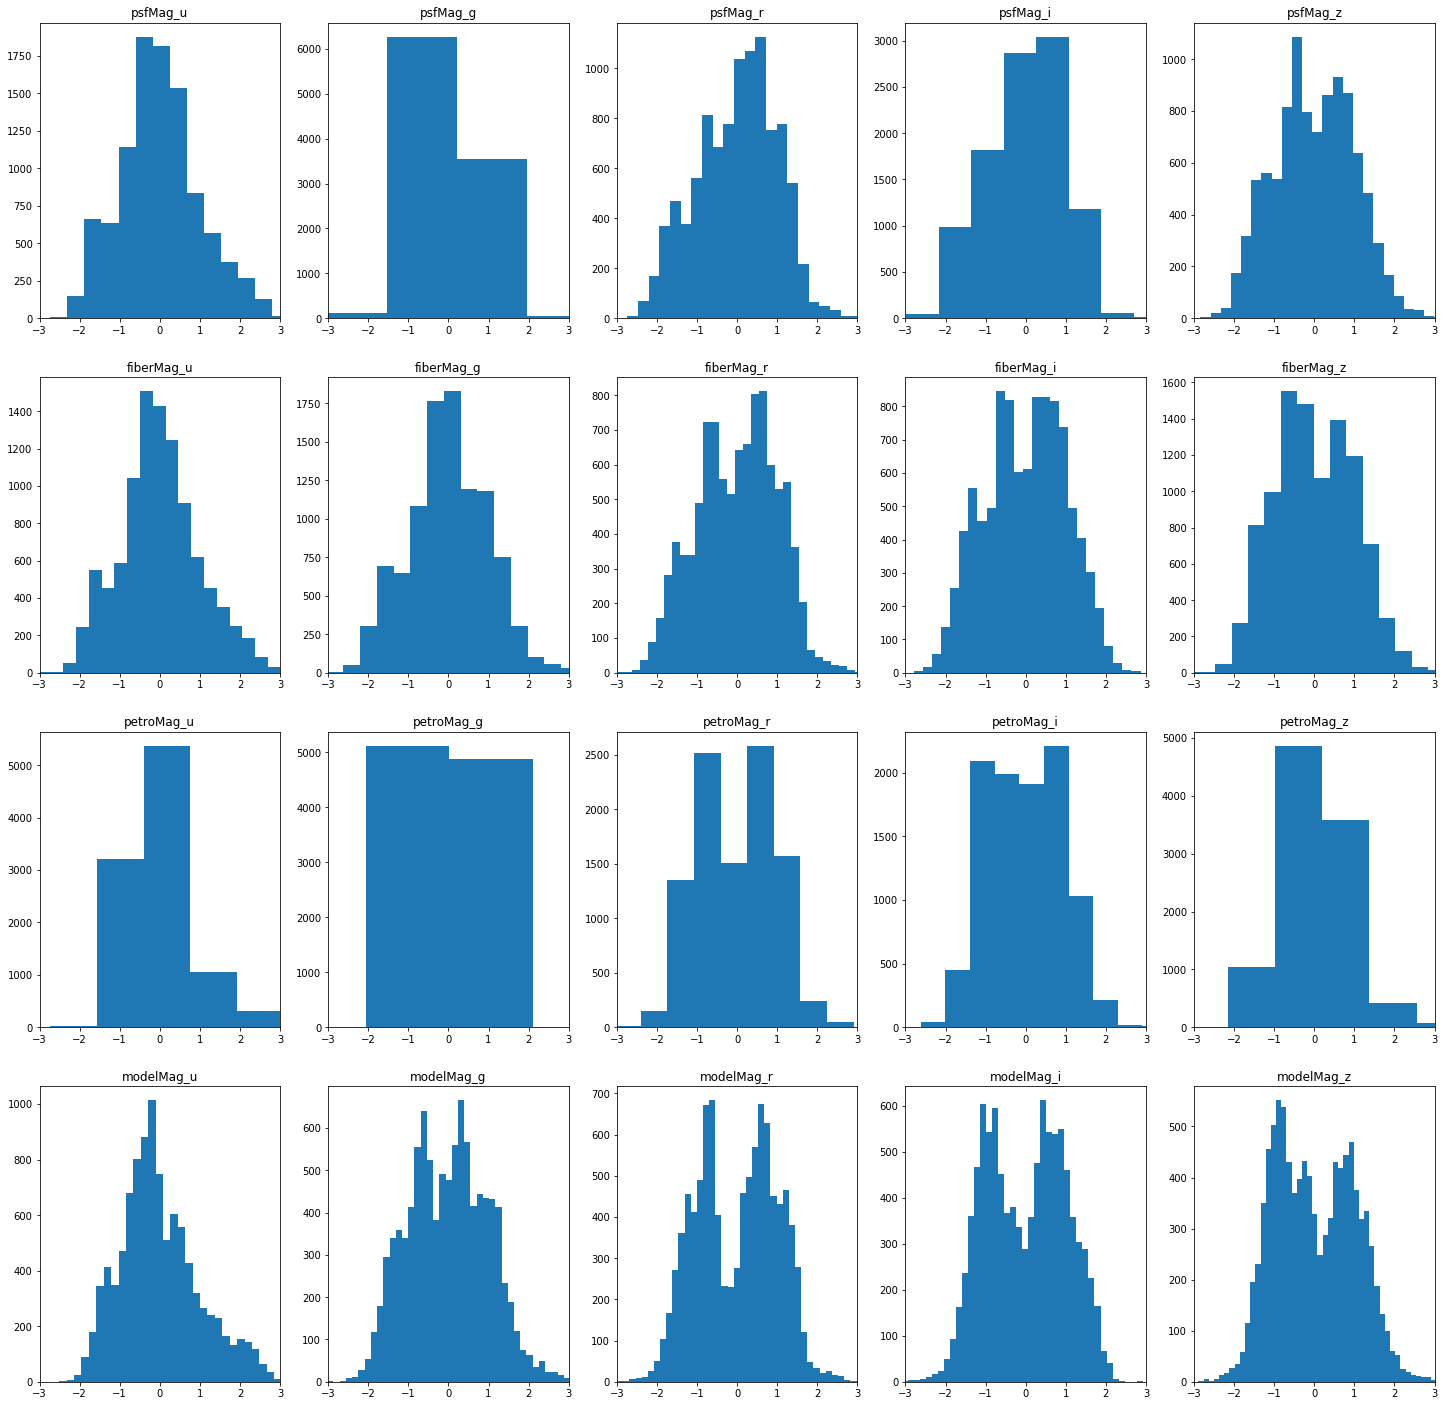

In [5]:
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(25,25))

scaler1 = StandardScaler()
x3_da=x.copy()
scaler1.fit(x3_da)
x3_da = scaler1.transform(x3_da)

std_ratio=3.

for i in range(0,20):

    x1 = std_ratio
    x2 = -std_ratio 

    idx= (x3_da[:,i]>x1 ) | (x3_da[:,i]<x2)     

    val1=len(x3_da[idx,i])
    val2=np.round(x3_da[~idx,i].mean(),4)
    val3=np.round(x3_da[~idx,i].std(),4)

    
    val4=np.round(np.median((x3_da[~idx,i])),4)
    
    if i ==0: 
        print("표준편차가 {} 이상인 변수들\n".format(std_ratio))
        print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format('COLUMN','Count','  Mean', 'Std', 'Median'))
    print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format(col_name[i],val1,val2,val3,val4))

    #######################
    #
    #   이상치 제거
    #
    #x3_da[idx,i]=val4
    #
    #
    #######################
    
    plt.subplot(4,5,i+1)
    plt.hist(x3_da[:,i],bins=50)
    plt.gca().set_title(col_name[i])
    plt.xlim(-std_ratio,std_ratio)
    
plt.show()


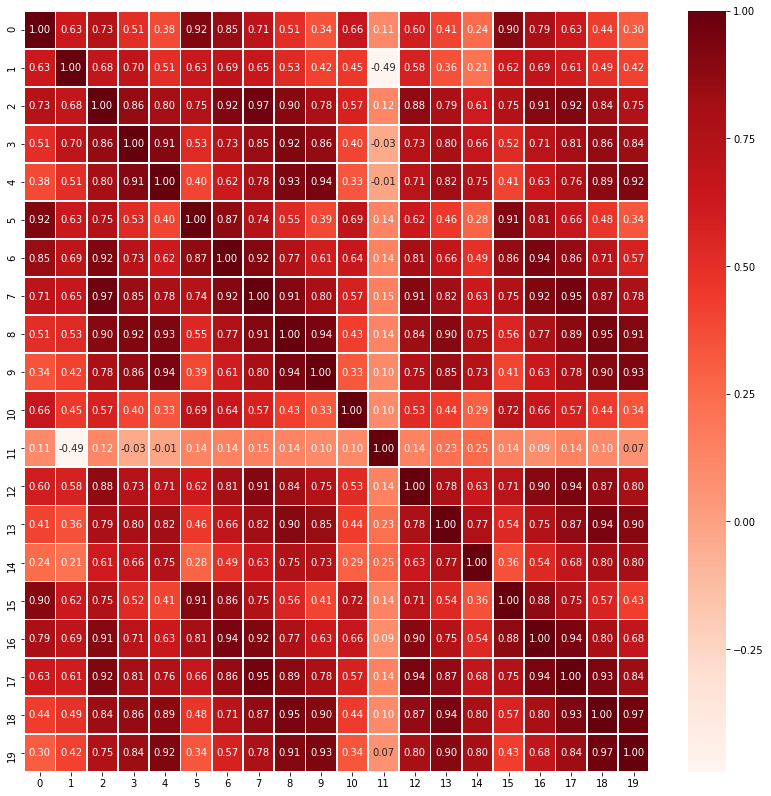

In [6]:
plt.figure(figsize=(14,14))
x3_fr=pd.DataFrame(x3_da)
sns.heatmap(data = x3_fr.corr(), annot=True, fmt = '.2f', linewidths=.8, cmap='Reds')

## Apply Robust and Delete Index and Plot

특정 조건을 선택한 경우

      COLUMN   Count     Mean      Std     Median
    psfMag_u       2   0.0535   0.8327        0.0
    psfMag_g       4  -0.0189   0.7512    -0.0001
    psfMag_r       1  -0.0677   0.6952    -0.0001
    psfMag_i       4  -0.0694   0.6941    -0.0001
    psfMag_z       2   0.0084   0.6879    -0.0001
  fiberMag_u       2   0.0586   0.8241    -0.0003
  fiberMag_g       2   0.0062    0.733    -0.0004
  fiberMag_r       0   -0.052   0.6833        0.0
  fiberMag_i       0  -0.0401   0.6733        0.0
  fiberMag_z       1   0.0516   0.6736     0.0002
  petroMag_u      20   0.1292   0.8985    -0.0006
  petroMag_g       9   0.0084   0.7055     0.0001
  petroMag_r       3  -0.0672   0.6476     0.0001
  petroMag_i       6  -0.0246   0.6326    -0.0001
  petroMag_z       7   0.0788   0.6774    -0.0002
  modelMag_u       0   0.1198   0.8027        0.0
  modelMag_g       0  -0.0022   0.6711        0.0
  modelMag_r       0  -0.0745   0.6262        0.0
  modelMag_i       0  -0.0376   0.5

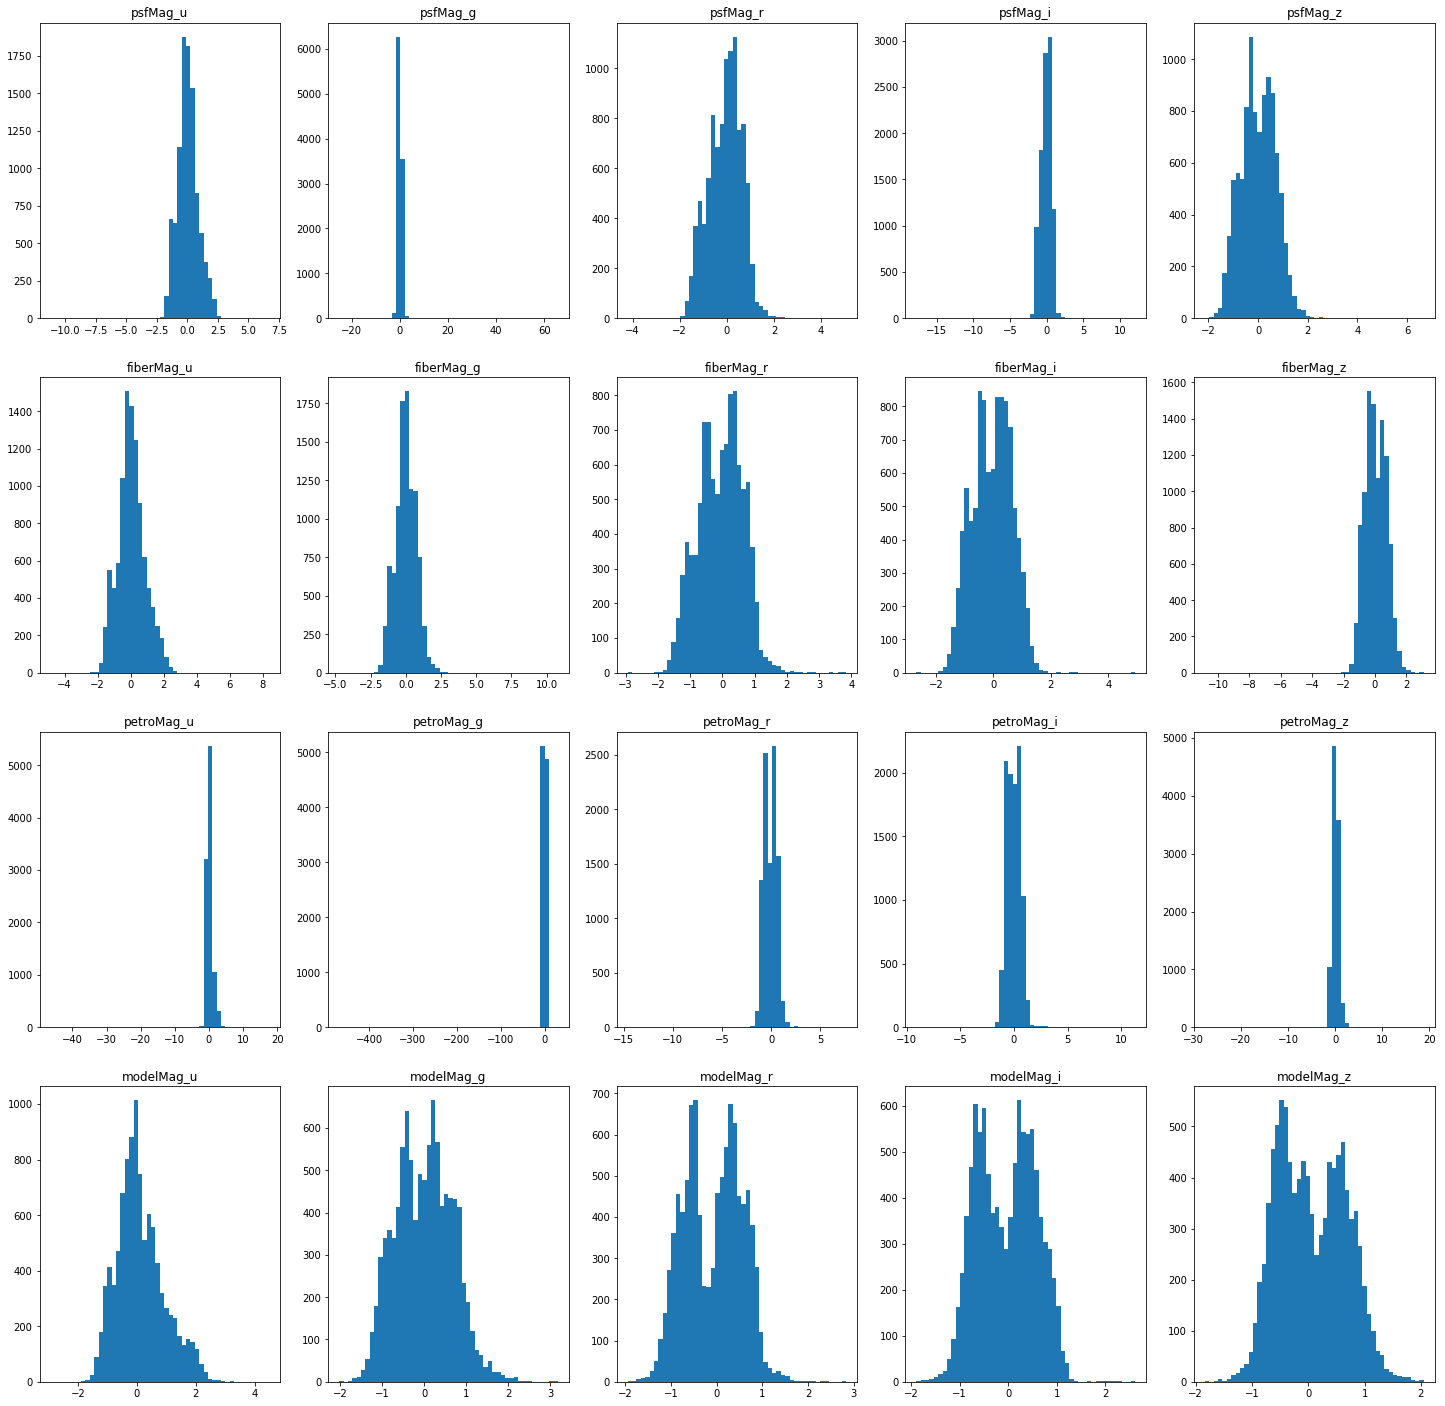

In [7]:
from sklearn.preprocessing import RobustScaler

plt.figure(figsize=(25,25))
scaler2 = RobustScaler()

x4_da=x.copy()
scaler2.fit(x4_da)
x4_da = scaler2.transform(x4_da)

x_len= 5

for i in range(0,20):
    
    x1 = x_len
    x2 = -x_len 

    idx= (x4_da[:,i]>x1 ) | (x4_da[:,i]<x2)     

    val1=len(x4_da[idx,i])
    val2=np.round(x4_da[~idx,i].mean(),4)
    val3=np.round(x4_da[~idx,i].std(),4)
   
    val4=np.round(np.median((x4_da[~idx,i])),4)
    
    if i ==0: 
        print("특정 조건을 선택한 경우\n")
        print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format('COLUMN','Count','  Mean', 'Std', 'Median'))
    print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format(col_name[i],val1,val2,val3,val4))

    

    #######################
    #
    #   이상치 제거
    #
    #x4_da[idx,i]=val4
    #
    #
    #######################
    
    plt.subplot(4,5,i+1)
    plt.hist(x4_da[:,i],bins=50)
    plt.gca().set_title(col_name[i])
     
plt.show()

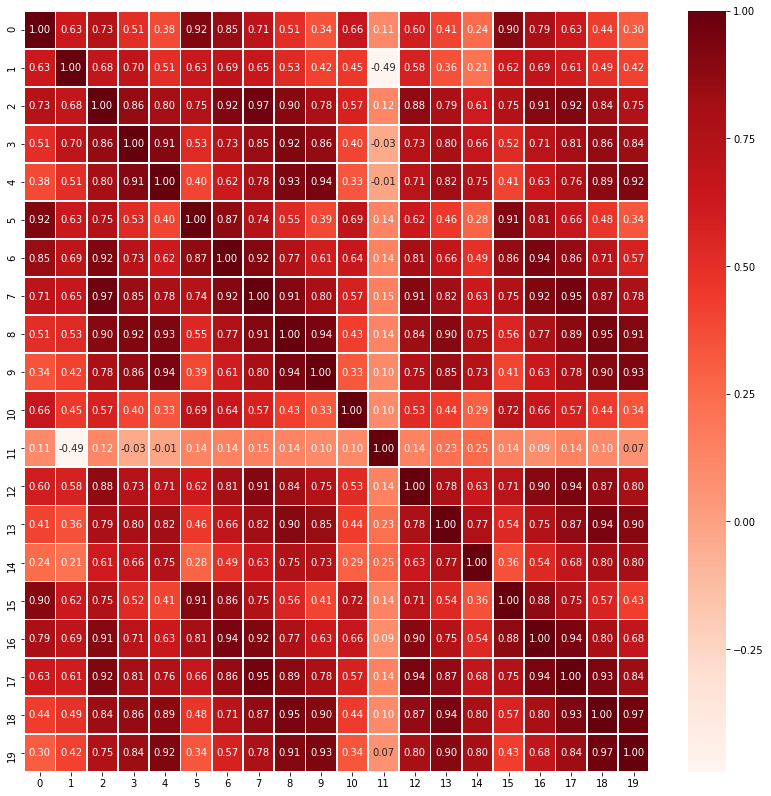

In [8]:
plt.figure(figsize=(14,14))
x4_fr=pd.DataFrame(x4_da)
sns.heatmap(data = x4_fr.corr(), annot=True, fmt = '.2f', linewidths=.8, cmap='Reds')

## Using Percentile and Delete Index and Plot

특정 조건을 선택한 경우

      COLUMN     Count       Mean        Std       Median
    psfMag_u        10     20.987     2.0751      20.8544
    psfMag_g        10     19.864     1.8556      19.9103
    psfMag_r        10    19.2788     1.6928      19.4449
    psfMag_i        10    18.8708     1.6189      19.0333
    psfMag_z        10    18.6155     1.6812      18.5947
  fiberMag_u        10    21.1831      1.966      21.0407
  fiberMag_g        10    20.0884     1.8303      20.0717
  fiberMag_r        10    19.4961     1.6963      19.6279
  fiberMag_i        10    19.0821      1.622      19.1806
  fiberMag_z        10    18.8287     1.6784      18.6998
  petroMag_u        10    20.7202     2.3549       20.371
  petroMag_g        10    19.6062     2.0568       19.583
  petroMag_r        10    18.9969     1.8917      19.1971
  petroMag_i        10    18.6116     1.8719      18.6843
  petroMag_z        10     18.412     2.0333       18.172
  modelMag_u        10    20.7374     2.1742      20.4127

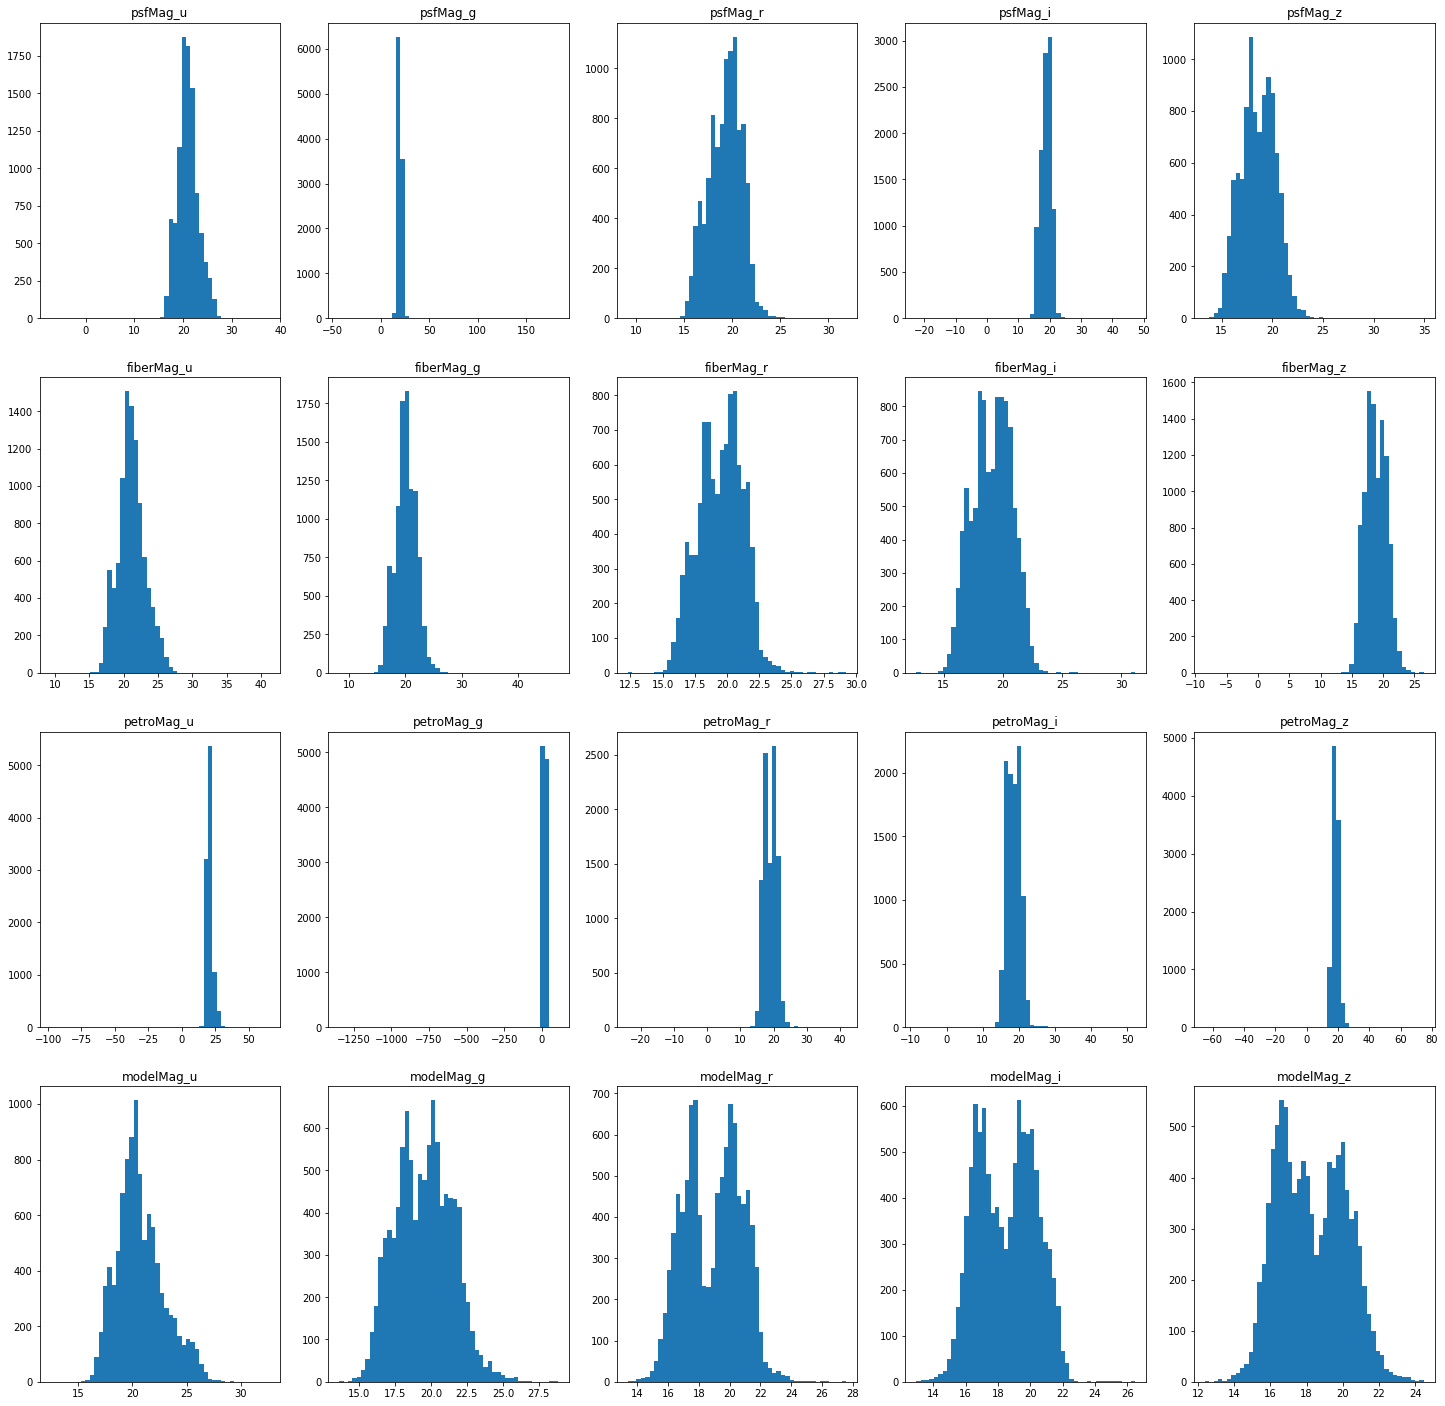

In [9]:
from sklearn.preprocessing import RobustScaler

plt.figure(figsize=(25,25))

perc=0.04
x5_da=x.copy()

for i in range(0,20):
  
    x1 = np.percentile(x5_da[:,i], perc)
    x2 = np.percentile(x5_da[:,i], 100.-perc)
    
    idx=(x5_da[:,i]>x2) | (x5_da[:,i]<x1)
    
    val1=len(x5_da[idx,i])
    val2=np.round(x5_da[~idx,i].mean(),4)
    val3=np.round(x5_da[~idx,i].std(),4)

        
    val4=np.round(np.median((x5_da[~idx,i])),4)
    
    if i ==0: 
        print("특정 조건을 선택한 경우\n")
        print('{:>12}{:>10}{:>11}{:>11}{:>13}'.format('COLUMN','Count','  Mean', 'Std', 'Median'))
    print('{:>12}{:>10}{:>11}{:>11}{:>13}'.format(col_name[i],val1,val2,val3,val4))


    #######################
    #
    #   이상치 제거
    #
    #x5_da[idx,i]=val4
    #
    #
    #######################  
    
    plt.subplot(4,5,i+1)
    plt.hist(x5_da[:,i],bins=50)
    plt.gca().set_title(col_name[i])

plt.show()

In [ ]:
plt.figure(figsize=(14,14))
x5_fr=pd.DataFrame(x5_da)
sns.heatmap(data = x5_fr.corr(), annot=True, fmt = '.2f', linewidths=.8, cmap='Reds')